In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, create_session
from sqlalchemy import create_engine, func

In [31]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [122]:
# We can view all of the classes that automap found
# for mappedclass in Base.classes:
#     print (mappedclass)
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
# Measurement, Station = Base.classes.measurement, Base.classes.station
Measurement = Base.classes.measurement
Station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
Session = create_session(bind = engine)

# Exploratory Climate Analysis

/Users/nicolepipkins/opt/anaconda3/envs/nicole/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


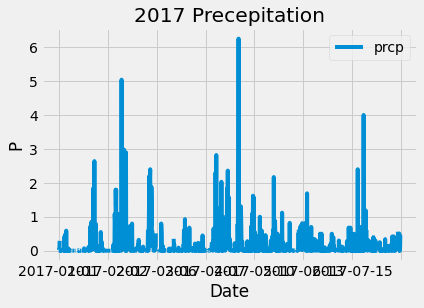

In [250]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# engine.execute("select * from measurement where date >= '2016-01-01'").fetchall()

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
x = Session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2017-01-01')

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(x).set_index('date')

# Sort the dataframe by date
df = df.sort_values(by='date', axis=0, ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(y='prcp', use_index=True)

plt.title('2017 Precepitation')
plt.xlabel('Date')
plt.ylabel('P')
plt.show()

In [251]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [252]:
# Design a query to show how many stations are available in this dataset?
y = Session.query(Station.station)
df = pd.DataFrame(y)
df

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [253]:
xy = Session.query(Measurement).group_by(Measurement.station).order_by(Measurement.station).count()
xy

9

In [254]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = pd.read_sql("SELECT station, count(station) as counts FROM Measurement GROUP BY station ORDER BY count(*) DESC", engine)
most_active

,station,counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [247]:
x = Session.query(Measurement.station, Measurement.prcp).filter(Measurement.date > '2017-01-01')
x

In [245]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highet_temp = pd.read_sql("SELECT station, max(tobs) as highest_temp FROM Measurement WHERE station = 'USC00519281'", engine)
highet_temp

,station,highest_temp
0,USC00519281,85.0


In [244]:
lowest_temp = pd.read_sql("SELECT station, min(tobs) as lowest_temp FROM Measurement WHERE station = 'USC00519281'", engine)
lowest_temp

,station,lowest_temp
0,USC00519281,54.0


In [242]:
average_temp = pd.read_sql("SELECT station, avg(tobs) as average_temp FROM Measurement WHERE station = 'USC00519281'", engine)
average_temp 

,station,average_temp
0,USC00519281,71.663781


/Users/nicolepipkins/opt/anaconda3/envs/nicole/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


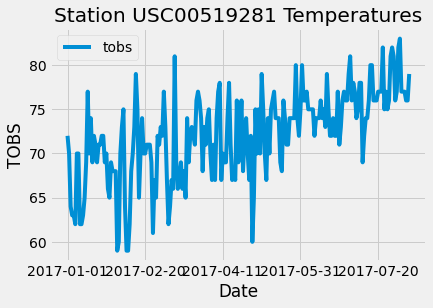

In [236]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogramdata3
tobs = pd.read_sql("SELECT station, date, tobs FROM Measurement WHERE station = 'USC00519281' AND date >= '2017-01-01'", engine)
tobs.plot(x="date",y="tobs")

plt.title('Station USC00519281 Temperatures')
plt.xlabel('Date')
plt.ylabel('TOBS')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
